
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [2]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# Import relevant Libraries
#

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Flatten

In [4]:
# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


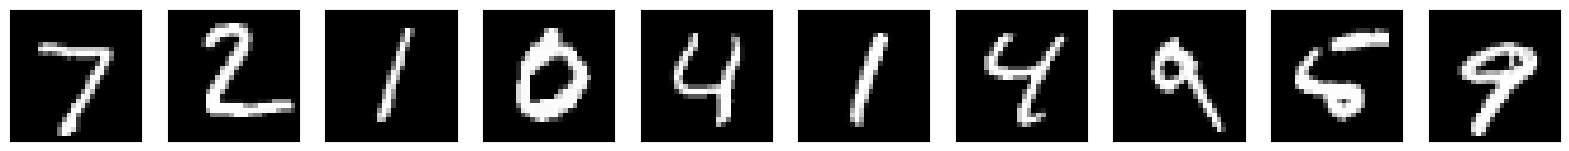

In [5]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [6]:
# Normalize train data - Divide by 255
x_train = x_train / 255
# Normalize test data - Divide by 255
x_test = x_test / 255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [7]:

encoder = keras.Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choice
encoder.add(Dense(500,activation='relu'))
encoder.add(Dense(300,activation='relu'))
encoder.add(Dense(90,activation ='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# print the encoder model
Model.summary(encoder)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               392500    
                                                                 
 dense_8 (Dense)             (None, 300)               150300    
                                                                 
 dense_9 (Dense)             (None, 90)                27090     
                                                                 
 dense_10 (Dense)            (None, 50)                4550      
                                                                 
 dense_11 (Dense)            (None, 25)                1275      
                                                                 
Total params: 575715 (2.20 MB)
Trainable params: 57571

In [34]:
from keras.layers import Reshape
from keras.models import Sequential
decoder = keras.Sequential()
decoder.add(Dense(250,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(70,activation='relu'))
decoder.add(Dense(50,activation='relu'))
decoder.add(Dense(25,activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [35]:
# print the decoder model
Model.summary(decoder)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 250)               6500      
                                                                 
 dense_25 (Dense)            (None, 100)               25100     
                                                                 
 dense_26 (Dense)            (None, 70)                7070      
                                                                 
 dense_27 (Dense)            (None, 50)                3550      
                                                                 
 dense_28 (Dense)            (None, 25)                1275      
                                                                 
 dense_29 (Dense)            (None, 784)               20384     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)           

In [36]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [37]:
# print the autoencoder model
Model.summary(autoencoder)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 25)                575715    
                                                                 
 sequential_6 (Sequential)   (None, 28, 28)            63879     
                                                                 
Total params: 639594 (2.44 MB)
Trainable params: 639594 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.

autoencoder.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [47]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
history = autoencoder.fit(x_train, x_train, epochs=20,validation_data=[x_test, x_test])

Epoch 1/20


1875/1875 [==============================] - 17s 6ms/step - loss: 0.2036 - accuracy: 0.1343 - val_loss: 0.1595 - val_accuracy: 0.1755
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1499 - accuracy: 0.1947 - val_loss: 0.1395 - val_accuracy: 0.2062
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1356 - accuracy: 0.2161 - val_loss: 0.1307 - val_accuracy: 0.2184
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1270 - accuracy: 0.2276 - val_loss: 0.1222 - val_accuracy: 0.2351
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1216 - accuracy: 0.2357 - val_loss: 0.1176 - val_accuracy: 0.2362
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1184 - accuracy: 0.2414 - val_loss: 0.1164 - val_accuracy: 0.2310
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1163 - accuracy: 0.2443 - val_loss: 0.1138 - val_

313/313 [==============================] - 1s 2ms/step


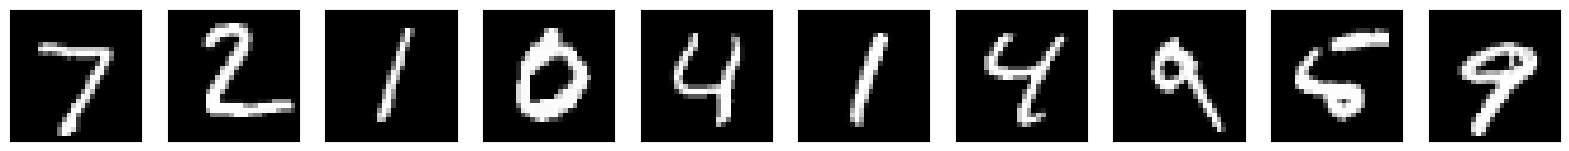

In [50]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
 # Display original image - Just line sample code provided earlier.
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

    # 


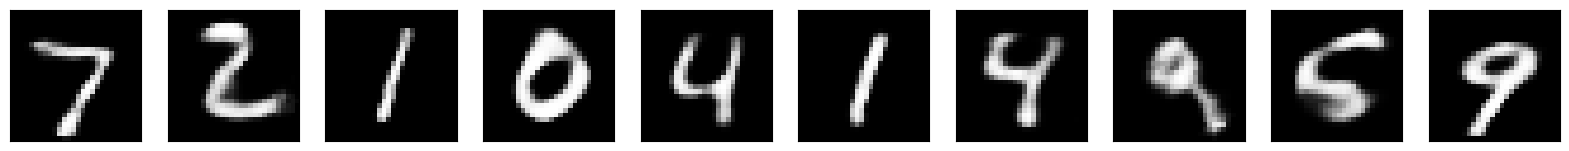

In [54]:
# Display reconstruced (decoded) images. You need to slightly change your code.
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [55]:
from tensorflow.keras.layers import GaussianNoise

In [56]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

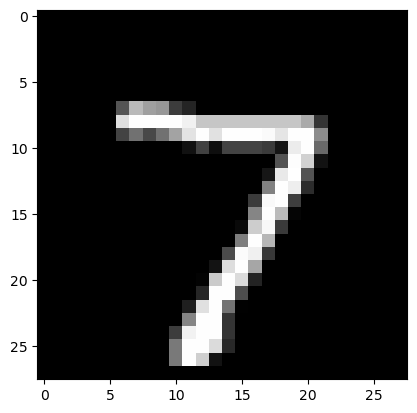

In [57]:
plt.imshow(x_test[0])

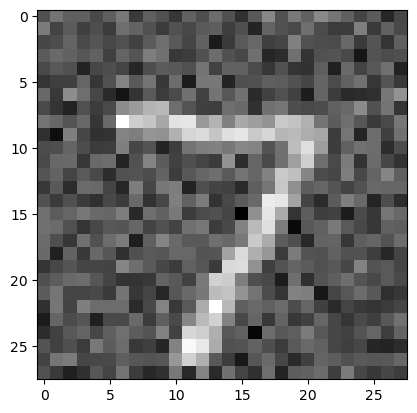

In [58]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [59]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.

encoder.add(Dense(500,activation='relu'))
encoder.add(Dense(300,activation='relu'))
encoder.add(Dense(90,activation ='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [60]:
decoder = Sequential()
decoder.add(Dense(250,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(70,activation='relu'))
decoder.add(Dense(50,activation='relu'))
decoder.add(Dense(25,activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [61]:
noise_remover = Sequential([encoder, decoder])

In [1]:
model.summary()

NameError: name 'model' is not defined

In [62]:
# Compile the network as earlier
noise_remover.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [63]:
# Fit the network as earlier.
history = noise_remover.fit(x_train, x_train, epochs=20,validation_data=[x_test, x_test])

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2050 - accuracy: 0.1363 - val_loss: 0.1613 - val_accuracy: 0.1874
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1540 - accuracy: 0.1937 - val_loss: 0.1404 - val_accuracy: 0.2114
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1400 - accuracy: 0.2132 - val_loss: 0.1312 - val_accuracy: 0.2204
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1322 - accuracy: 0.2237 - val_loss: 0.1254 - val_accuracy: 0.2289
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1267 - accuracy: 0.2304 - val_loss: 0.1200 - val_accuracy: 0.2325
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1229 - accuracy: 0.2352 - val_loss: 0.1163 - val_accuracy: 0.2427
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1204 - accuracy: 0.2399 - val_loss: 0.1149 - val_ac

In [64]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


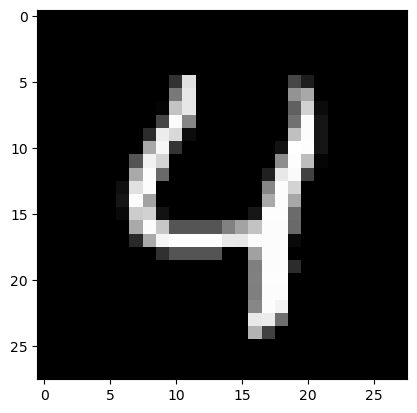

The Noisey Version


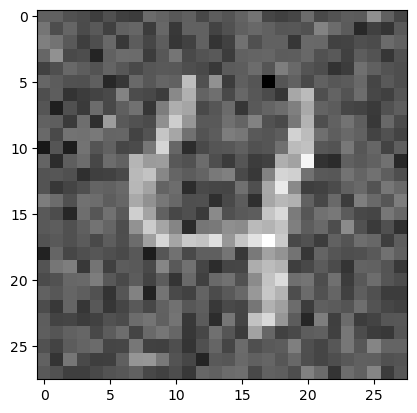

After going through denoiser


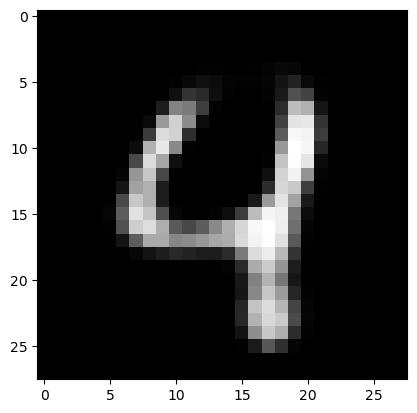

In [65]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.